<a href="https://colab.research.google.com/github/vaibhav0809git/Stock-Prices-Predictor/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install yfinance


In [42]:
import yfinance as yf

# Fetch data for a specific stock
data = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2015-01-02  24.347174  27.332500  27.860001  26.837500  27.847500  212818400
2015-01-05  23.661280  26.562500  27.162500  26.352501  27.072500  257142000
2015-01-06  23.663500  26.565001  26.857500  26.157499  26.635000  263188400
2015-01-07  23.995312  26.937500  27.049999  26.674999  26.799999  160423600
2015-01-08  24.917267  27.972500  28.037500  27.174999  27.307501  237458000


In [43]:
import numpy as np
import pandas as pd


In [44]:
data['Predicted'] = np.nan  # Create an empty column first
data['Predicted'][-len(predictions):] = predictions.flatten()  # Fill with predictions

<ipython-input-44-31b6acc105bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted'][-len(predictions):] = predictions.flatten()  # Fill with predictions


In [45]:
data.fillna(method="ffill", inplace=True)


<ipython-input-45-625cd8632878>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

import numpy as np

X_train, y_train = [], []
sequence_length = 60  # Use past 60 days to predict the next day

for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)  # Prediction of next day's price
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)






/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0449
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - loss: 0.0022
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0019
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0019
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0018
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0015
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0016
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0015
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0013
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0013
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0014
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0015
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0014
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0013
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0012
Ep

In [47]:
test_data = scaled_data[-(sequence_length + 30):]
X_test = []

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


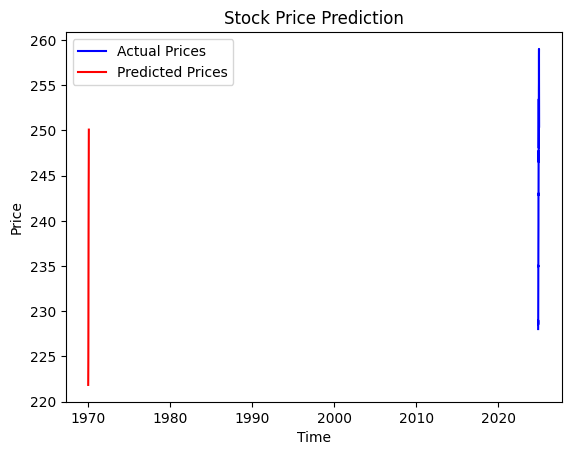

In [48]:
import matplotlib.pyplot as plt

plt.plot(data['Close'][-len(predictions):], color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [49]:
!pip install streamlit

In [55]:
import streamlit as st

st.title("Stock Price Predictor")
import streamlit as st

st.title("Stock Price Predictor")
st.line_chart(data={"Actual": data["Close"][-len(predictions):].values, "Predicted": predictions.flatten()})

!streamlit run app.py

2025-01-02 18:10:56.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 18:10:56.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 18:10:56.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 18:10:56.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


StreamlitAPIException: 
Unable to convert object of type `<class 'dict'>` to `pandas.DataFrame`.
Offending object:
```py
{'Actual': array([[228.02000427],
       [228.27999878],
       [229.        ],
       [228.52000427],
       [229.86999512],
       [232.86999512],
       [235.05999756],
       [234.92999268],
       [237.33000183],
       [239.58999634],
       [242.6499939 ],
       [243.00999451],
       [243.03999329],
       [242.83999634],
       [246.75      ],
       [247.77000427],
       [246.49000549],
       [247.96000671],
       [248.13000488],
       [251.03999329],
       [253.47999573],
       [248.05000305],
       [249.78999329],
       [254.49000549],
       [255.27000427],
       [258.20001221],
       [259.01998901],
       [255.58999634],
       [252.19999695],
       [250.41999817]]), 'Predicted': array([221.83981, 222.14557, 222.56035, 223.06903, 223.55363, 224.0971 ,
       224.86949, 225.8855 , 226.95251, 228.16434, 229.54028, 231.14655,
       232.78133, 234.30501, 235.62016, 237.01904, 238.41599, 239.5903 ,
       240.6599 , 241.58122, 242.57317, 243.71051, 244.38834, 244.90417,
       245.64691, 246.50485, 247.6046 , 248.81645, 249.71568, 250.09212],
      dtype=float32)}
```

In [56]:
from flask import Flask, request, jsonify
import joblib  # For loading your trained model
import numpy as np

app = Flask(__name__)

# Load your trained model
model = joblib.load("Stock Price Predictor.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Example: Input features for prediction
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"prediction": prediction})

if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Stock Price Predictor.pkl'